In [34]:
# Importo las bibliotecas que voy a utilizar

import numpy as np
import matplotlib.pyplot as plt
import ht, pint
from IPython.display import Image
from scipy.special import erf, erfc

## Trabajo Práctico Nº2 - No estacionario

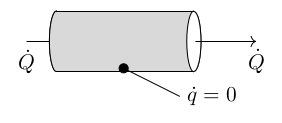

In [3]:
Image("barra.png",width = 600, height = 300)

Una barra de área transversal uniforme $A_c=0.1 m^2$ y perímetro $per=0.05m$ se coloca en vacío.

Su longitud es de $L=0.09 m$ y su superficie externa puede considerarse adiabática. Durante un tiempo prolongado se transfiere calor en un extremo de la barra, $\dot q(x=0)=100 \ watt$. El otro extremo se mantiene a una temperatura constante $T(x=L)=20^\circ{C}$. El material tiene una densidad de $\rho=5000 kg/m^3$, capacidad calorífica $C_p=500J/kg K$ y conductividad $k=5 W/m K$.
En estas condiciones, estacionarias, se produce un cambio. para el instante, $t=0$, el calor $\dot q (x=0,t=0)= 0 \ watt$.

¿Qué tiempo aproximado le lleva a la barra a responder ante el cambio de condiciones de transferencia?
Realice un gráfico para la distribución de temperaturas para $t=0$, $t=\infty$ y para $t=1$ hora.

### Resolución:

Primero calculo al difusividad térmica de mi cilindro, sabiendo que:

$$\alpha = \frac{k}{\rho c_p}$$

Donde:

$\alpha:$ Difusividad térmica. $[\frac{m^2}{s}]$

$k:$ Conductividad térmica. $[\frac{W}{m K}]$

$\rho:$ Densidad. $[\frac{Kg}{m^3}]$

$c_p:$ Calor especíifico a presión constante. $[\frac{J}{Kg K}]$


En mi caso:

$$\alpha = \frac{5 \frac{W}{m K}}{5000 \frac{Kg}{m^3} \cdot 500 \frac{J}{Kg K}}$$

In [15]:
k = 5 # Conductividad
rho = 5000 # Densidad
cp = 500 # Calor específico

difusividad = k / (rho * cp) # Difusividad

print('Difusividad térmica: ',difusividad,'m2/s')

Difusividad térmica:  2e-06 m2/s


Teniendo este valor, puedo calcular el tiempo difusivo o de relajación $\tau$ como:

$$\tau = \frac{L^2}{\alpha}$$ 

In [27]:
L = 0.09 # Longitud

tiempo_dif = L**2 / difusividad

print('Tiempo difusivo para la longitud de la barra: ',tiempo_dif/3600,' horas')

Tiempo difusivo para la longitud de la barra:  1.125  horas


Para conocer el perfil de temperatruas a tiempo $t=0$. Voy a utilizar la solución de la ecuación diferencial para un sólido semi-infinito de una geometria plana, el cual está recibiendo  una cantidad de calor $\dot{q}$ constante en la superficie de separación.

$$T = T_0 + \frac{q_s}{\lambda}\left(\left(\frac{4\alpha t}{\pi}\right)^{\frac{1}{2}}e^\left({\cfrac{-x^2}{4\alpha t}}\right)-x\left(1-erf\left(\frac{x}{4\alpha t}\right)\right)\right)$$

In [85]:
x = np.linspace(0,0.09,1000)

def temperatura(x,t):
    T_cero = 20
    q_sup = 100
    
    j = 4*difusividad*t
    a = np.sqrt(j/np.pi)
    b = np.exp(-(x**2)/j)
    c = x*erfc(x/np.sqrt(j))
    
    return T_cero + q_sup * (a * b - c) / k

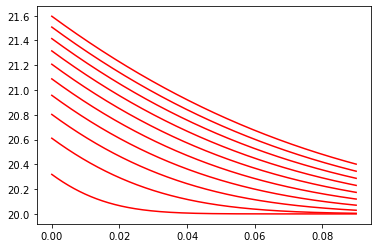

In [94]:
tiempos = np.linspace(100,2500,10)

for i in tiempos:
    plt.plot(x,temperatura(x,i), color='red')
plt.show()